### Problem 2 Gauss-Newton Method
Nonlinear Least Squares (NLLS) problems arise in a large number of practical
scientic and engineering contexts, and represent an important class of numerical optimization problems.
NLLS problems commonly arise when trying to t a model to a measured data set in a way that minimizes
the discrepancy between model predictions and measured data. The simplest objective to minimize is
the sum of the squares of the discrepancies at the measured data points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

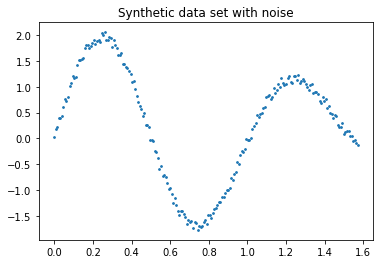

In [2]:
m=200
t=np.linspace(0,np.pi/2,m)
p=lambda t:0.8*np.sin(2*np.pi*1.15*t)+1.2*np.sin(2*np.pi*0.9*t)
noise=0.2*np.random.uniform(-.5,0.5,m)
y=p(t)+noise
y=np.array(y)
plt.scatter(t,y,s=3)
plt.title('Synthetic data set with noise')
plt.show()

In [3]:
# the objective function
def object_f(t,y,a):
    r=a[0]*np.sin(2*np.pi*a[1]*t)+a[2]*np.sin(2*np.pi*a[3]*t)-y
    return (r,0.5*np.transpose(r)@r)

In [18]:
grad_f(t,y,a).shape

(4,)

In [15]:
# the gradient of the function
def grad_f(t,y,a):
    J=np.zeros((y.shape[0],a.shape[0]))
    r=object_f(t,y,a)[0]
    J[:,0]=np.sin(2*np.pi*a[1]*t)#calculate the jacobian
    J[:,1]=a[0]*np.cos(2*np.pi*a[1]*t)*2*np.pi*t
    J[:,2]=np.sin(2*np.pi*a[3]*t)
    J[:,3]=a[2]*np.cos(2*np.pi*a[3]*t)*2*np.pi*t
    return np.transpose(J)@r

In [9]:
# the hessian of the function
def hessian_f(t,y,a):
    J=np.zeros((y.shape[0],a.shape[0]))
    #calculate the jacobian
    J[:,0]=np.sin(2*np.pi*a[1]*t)
    J[:,1]=a[0]*np.cos(2*np.pi*a[1]*t)*2*np.pi*t
    J[:,2]=np.sin(2*np.pi*a[3]*t)
    J[:,3]=a[2]*np.cos(2*np.pi*a[3]*t)*2*np.pi*t
    return np.transpose(J)@J

In [293]:
def backtrack_linesearch(t1,y1,object_f, gk, pk, xk, alpha = 0.1, beta = 0.8):
    t = 1
    while ( object_f(t1,y1,xk + t*pk)[1] >= object_f(t1,y1,xk)[1] + alpha * t * gk @ pk ):
        t *= beta
    return t

def newton_bt(t1,y1,object_f, grad,  hessian_f, x0, tol = 1e-5):
    x = x0
    history = np.array( [x0] )
    while ( la.norm(grad(t1,y1,x)) > tol ):
        h = la.pinv(hessian_f(t1,y1,x),rcond=1e-20) # 
        p=-h@grad(t1,y1,x)
        t = backtrack_linesearch(t1,y1,object_f, grad(t1,y1,x), p, x)
        x=x+t*p
        history = np.vstack( (history, x) )
    return x, history

C:\Users\amir\Anaconda3\envs\machine_learning\lib\site-packages\matplotlib\axes\_base.py:2204: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if axis in ['x', 'both']:
C:\Users\amir\Anaconda3\envs\machine_learning\lib\site-packages\matplotlib\axes\_base.py:2207: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if axis in ['y', 'both']:


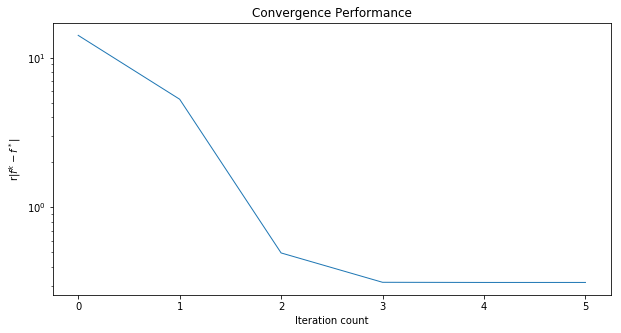

In [294]:
a0=np.array([1,1,1,1])

xstart, hist = newton_bt(t,y,object_f, grad_f,hessian_f, a0)
nsteps = hist.shape[0]
fhist = np.zeros(nsteps)
for i in range(nsteps):
    fhist[i] = object_f(t,y,hist[i,:])[1]
plt.figure()
plt.autoscale(enable=True, axis=t, tight=True)
plt.semilogy(np.arange(0, nsteps), np.absolute(fhist), linewidth=1)
plt.title('Convergence Performance')
plt.xlabel('Iteration count')
plt.ylabel('r$|f^k - f^*|$')
plt.show()

In [287]:
hist

array([[1.        , 1.        , 1.        , 1.        ],
       [0.794375  , 1.13      , 0.96625   , 0.86      ],
       [0.87848909, 1.13783981, 1.12528477, 0.89446297],
       [0.83473646, 1.14211505, 1.17135566, 0.89510941],
       [0.83558485, 1.14217883, 1.17052705, 0.89501031],
       [0.83558321, 1.14217897, 1.17052834, 0.89501053]])

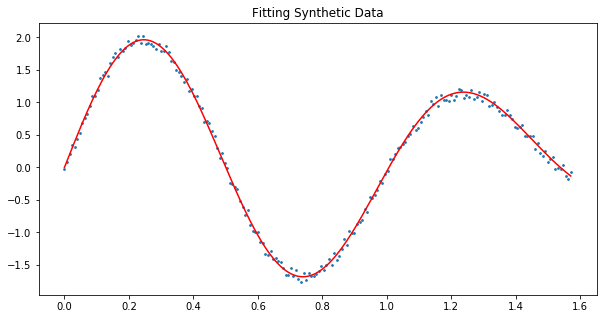

In [295]:
a=hist[-1]
m=200
t=np.linspace(0,np.pi/2,m)
p=lambda t:0.8*np.sin(2*np.pi*1.15*t)+1.2*np.sin(2*np.pi*0.9*t)
p2=lambda t:a[0]*np.sin(2*np.pi*a[1]*t)+a[2]*np.sin(2*np.pi*a[3]*t)
noise=0.2*np.random.uniform(-.5,0.5,m)
y=p(t)+noise
y2=np.array(p(t))
y=np.array(y)
plt.scatter(t,y,s=3)
plt.plot(t,y2,'r')
plt.title('Fitting Synthetic Data')
plt.show()

### Quasi Newton Methods

When the Hessian of the objective is not available, is too expensive, or
is too cumbersome to compute, an approximation of it may be obtained by a low-rank update at every
iteration. The resulting methods are known as quasi-Newton methods. Among the many quasi-Newton
methods, the BFGS method is perhaps the most popular. It is a rank 2 update which may be written
as: $\nabla^2 f^*$. The ierative updates are defined as: 
$$B_{k+1} = B_k - \frac{y_k y_k^\top}{y_k^\top s_k} - \frac{B_k s_k s_k^\top B_k}{s_k^\top B_k s_k}$$ 
where $s_k = x_{k+1} - x_k$ and $y_k = \nabla f_{k+1} - \nabla f_k$.

This value can be found by imposing the following conditions:
- the quadratic model $m_{k+1} (\Delta x) = f_{k+1} + \nabla f_{k+1}^\top \Delta x + \frac{1}{2} \Delta x^\top B_{k+1} \Delta x$ must have at the latest 2 iterates gradients that match the gradients of $f$. In other words, $\nabla m_{k+1} (0) = \nabla f_{k+1}$ and $\nabla m(-\alpha_k p_k) = \nabla f_k$. These conditions lead to the condition $B_{k+1} s_k = y_k$. Since $B_k$ must be positive semi definite (hessian at optimal point), we get $s_k^\top B_k s_k = s_k^\top y_k \geq 0$ (n conditions).
- Another imposed condition is symmetry, i.e. $B_k = B_k^\top$ (n conditions).

$B_k$ has $\frac{n(n+1)}{2}$ degrees of freedom, and we have $2n$ constraints $\Rightarrow$ there are infinitely many solutions. To get a unique solution, we impose an additional condition for the rate of change of $B_k$. We then solve the following optimization problem:

\begin{equation*}
\begin{aligned}
B_{k+1} = & \; \underset{B}{\text{min}}
 & \Vert B - B_k \Vert \qquad \qquad \quad \\
& \;\; \text{s.t.}
& B = B^\top \qquad \qquad \quad \; \\
& & B s_k = y_k \qquad \forall \, k \qquad  
\end{aligned}
\end{equation*}

This optimization problem gives rise to the update equation described above.

From a computational perspective, it is convenient to store and update the inverse since the inverse will be used in the computation of the descent direction, and by storing it as $H_k = B_k^{-1}$, we can directly get the descent direction as $p_k = - H_k \nabla f_k$ instead of solving the system of equations $B_k p_k = - \nabla f_k$. 

The formula: 
$$B_{k+1}^{-1} = B_k^{-1} + \frac{\left(s_k^\top y_k + y_k^\top B_k^{-1} y_k\right) s_k s_k^\top}{\left(s_k^\top y_k\right)^2} - \frac{B_k^{-1} y_k s_k^\top + s_k y_k^\top B_k^{-1}}{s_k^\top y_k}$$


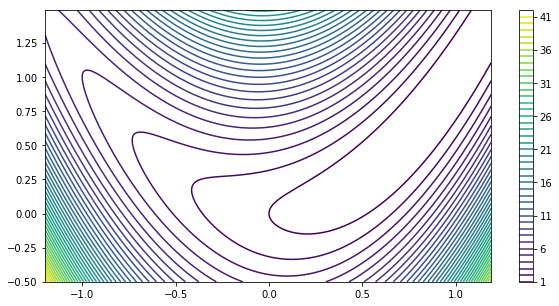

In [307]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from numpy import linalg as la
# Rosenbrock function
def rosen(x):
    y=10*(x[1]-x[0]**2)**2+(1-x[0])**2 # minimizer is at x=[1,1]
    return y
rcParams['figure.figsize'] = 10, 5
x0 = np.arange(-1.2, 1.2, 0.01) #https://www.python-course.eu/matplotlib_contour_plot.php
x1 = np.arange(-0.5, 1.5, 0.01) #https://www.cc.gatech.edu/classes/AY2015/cs2316_fall/codesamples/rosenbrock_demo.py
x0,x1 = np.meshgrid(x0, x1) #https://matplotlib.org/examples/pylab_examples/contour_demo.html
x=[x0,x1]
def plot_func(f,x):
    z=f(x)
    plt.contour(x[0],x[1],z,50)
    plt.colorbar()
    plt.show()
plot_func(rosen,x)


In [308]:
def backtrack_linesearch(f, gk, pk, xk, alpha = .1, beta = 0.5):
    t = 1
   
    while ( (f(xk + t*pk) >= f(xk) + alpha * t * gk @ pk)):
        t *= beta
    return t

def rosen_grad(x):
    g = np.zeros(2)
    g[0] = -40*x[0]*(x[1] - x[0]**2) + 2*x[0] - 2
    g[1] = 20*x[1] - 20*x[0]**2
    return g

def rosen_hessian(x):
    g = np.zeros([2,2])
    g[0,0] = -40*x[1]+120*x[0]**2 +2
    g[0,1] = -40*x[0]
    g[1,0]=-40*x[0]
    g[1,1]=20
    return g

def bfgs(f, grad, B, x0, tol = 1e-5):
    x = x0
    history = np.array( [x0] )
    while ( la.norm(grad(x)) > tol ):
       # print('step')
        p = -B@grad(x)
        #p=la.solve(B,-grad(x))
        #print(la.norm(grad(x)))
        t = backtrack_linesearch(f, grad(x), p, x)
        x+= t*p
        history = np.vstack( (history, x) )  
        y=(grad(history[-1])-grad(history[-2]))[np.newaxis]
        s=(history[-1]-history[-2])[np.newaxis]
       # print(np.transpose(s)@y)
       # B=B+y.T@y/(y@s.T)-B@s.T@s@B/(s@B@s.T) 
        B=B+((s@y.T)*s.T@s+y@B@y.T*s.T@s)/((s@y.T)**2)-(B@y.T@s+s.T@y@B)/(s@y.T)
    return x, history

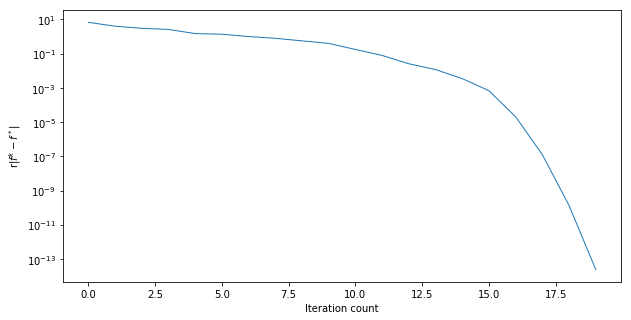

In [309]:
B=np.diag((1,1)) #initial guess of the hessian
x_0 = np.array([-1.2, 1.0])
#B=rosen_hessian(x_0)
xstart, hist = bfgs(rosen, rosen_grad,B, x_0)
nsteps = hist.shape[0]
fhist = np.zeros(nsteps)
for i in range(nsteps):
    fhist[i] = rosen(hist[i,:])
plt.figure()
plt.autoscale(enable=True, axis=x, tight=True)
plt.semilogy(np.arange(0, nsteps), np.absolute(fhist), linewidth=1)
plt.xlabel('Iteration count')
plt.ylabel('r$|f^k - f^*|$')
plt.show()

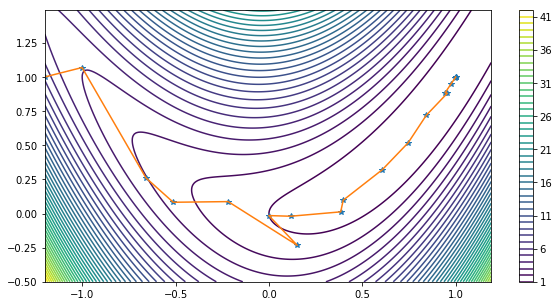

In [310]:
x1_val = [t[0] for t in hist]
x2_val = [t[1] for t in hist]
plt.plot(x1_val,x2_val,'*')
plt.plot(x1_val,x2_val)
plt.autoscale(enable=True, axis=x, tight=True)
plot_func(rosen,x)

In [311]:
a=np.array([1,2])
b=np.array([3,5])

In [193]:
np.outer(a,b)

array([[ 3,  5],
       [ 6, 10]])

In [196]:
import numpy as np
a = np.array([5,4])[np.newaxis]
print(a)
print(a.T)


[[5 4]]
[[5]
 [4]]


In [312]:
hist

array([[-1.20000000e+00,  1.00000000e+00],
       [-1.00062500e+00,  1.06875000e+00],
       [-6.58524055e-01,  2.60603221e-01],
       [-5.12455270e-01,  8.23282290e-02],
       [-2.18478103e-01,  8.71846423e-02],
       [ 1.51200195e-01, -2.32595305e-01],
       [-8.33976536e-04, -1.51543373e-02],
       [ 1.15447078e-01, -2.00276547e-02],
       [ 3.84013204e-01,  1.20765599e-02],
       [ 3.97568150e-01,  9.73960607e-02],
       [ 6.07547805e-01,  3.21678786e-01],
       [ 7.45153604e-01,  5.17725039e-01],
       [ 8.42391563e-01,  7.19219870e-01],
       [ 9.54928093e-01,  8.80594777e-01],
       [ 9.43260788e-01,  8.84297383e-01],
       [ 9.74099129e-01,  9.47591527e-01],
       [ 9.97976846e-01,  9.94669292e-01],
       [ 9.99649516e-01,  9.99278395e-01],
       [ 1.00000857e+00,  1.00001461e+00],
       [ 9.99999970e-01,  9.99999988e-01]])

In [318]:
np.log(rosen(hist[-3]))

-15.87790965703826

In [317]:
np.log(rosen(hist[-2]))

-22.70924203070481